In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.bbox"] = "tight"
mpl.rcParams["savefig.dpi"] = 300

import seaborn as sns
sns.set_context("paper")

from astropy.table import Table

In [81]:
# cks_st = Table.read("https://cdsarc.cds.unistra.fr/ftp/J/AJ/156/264/table2.dat",
#                     readme="https://cdsarc.cds.unistra.fr/ftp/J/AJ/156/264/ReadMe",
#                     format="ascii.cds")

# cks_st.info()

In [178]:
cks = pd.read_parquet('../data/data.parquet')
# The dataframe has a row entry for each KOI, meaning individual star are represented N times
# where N is the number of KOIs detected around that star so we drop duplicates.
print(np.shape(cks))
#cks = cks.drop_duplicates(subset=['kepid'], keep='first')
#print(np.shape(cks))

print(len(cks[np.isfinite(cks['gaia_ra'])]))
print(len(cks[np.isfinite(cks['ra'])]))

cks = cks.dropna(subset=['gaia_ra'])
print(np.shape(cks))
cks.head()

(9750, 1371)
9657
9750
(9657, 1371)


,kepid,kepoi_name,kepler_name,ra,ra_err,ra_str,dec,dec_err,dec_str,koi_gmag,...,bf18_e_[Na/N],bf18_[Na/C],bf18_e_[Na/C],bf18_[O/N],bf18_e_[O/N],bf18_[O/C],bf18_e_[O/C],bf18_[N/C],bf18_e_[N/C],bf18_[alpha/Fe]
0,10797460,K00752.01,Kepler-227 b,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
1,10797460,K00752.02,Kepler-227 c,291.93423,0.0,19h27m44.22s,48.141651,0.0,+48d08m29.9s,15.890,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
2,10811496,K00753.01,None,297.00482,0.0,19h48m01.16s,48.134129,0.0,+48d08m02.9s,15.943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10848459,K00754.01,None,285.53461,0.0,19h02m08.31s,48.285210,0.0,+48d17m06.8s,16.100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10854555,K00755.01,Kepler-664 b,288.75488,0.0,19h15m01.17s,48.226200,0.0,+48d13m34.3s,16.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
cks_pos = cks[['gaia_ra', 'gaia_dec']].copy()
cks_pos.head()
cks_pos.to_csv('../data/cks-gaia-coords.csv', index=False)

In [180]:
from astropy import units as u
from astroquery.xmatch import XMatch
import pandas as pd
table = XMatch.query(cat1=open('../data/cks-gaia-coords.csv'),
                     cat2='vizier:J/ApJS/245/34/catalog',
                     max_distance=1 * u.arcsec,
                     colRA1='gaia_ra',
                     colDec1='gaia_dec',
                     colRA2='RAJ2000',
                     colDec2='DEJ2000')

type(table)
print(table)

# Now let's try the xmatch by querying the Vizier URLs for both catalogs
# table2 = XMatch.query(cat1='vizier:J/AJ/156/264/table2',
#                      cat2='vizier:J/ApJS/245/34/catalog',
#                      max_distance=1 * u.arcsec,
#                      colRA1='_RA',
#                      colDec1='_DEC',
#                      colRA2='RAJ2000',
#                      colDec2='DEJ2000')


# type(table2)
# print(table2)
# There are fewer stars when querying Vizier directly. Unclear why.

angDist       gaia_ra            gaia_dec      ... Mult SubClass LAMOST
-------- ------------------ ------------------ ... ---- -------- ------
0.257082 289.55316319160744 41.056955000443175 ...  YES       F2 LAMOST
0.257082 289.55316319160744 41.056955000443175 ...  YES       F8 LAMOST
0.259741  298.4512684271757  46.62093214153987 ...  YES       G3 LAMOST
0.412724 291.54203897673284  48.99109840197671 ...  YES       M0 LAMOST
0.117943 286.54366910930287 45.304871639649804 ...  YES       F5 LAMOST
0.080179  291.5175360253133  49.43463737537928 ...  YES       F9 LAMOST
0.894592  291.5175360253133  49.43463737537928 ...  YES       G3 LAMOST
0.049284 286.51354344353126  45.03805341863095 ...  YES       F5 LAMOST
0.069307 298.90599129646057 47.611379445977654 ...  YES       F5 LAMOST
0.078917 298.90599129646057 47.611379445977654 ...  YES       F5 LAMOST
     ...                ...                ... ...  ...      ...    ...
 0.25562  282.0532102022119  42.86490577797512 ...   NO       G3

In [182]:
table.colnames

['angDist',
 'gaia_ra',
 'gaia_dec',
 '_RAJ2000',
 '_DEJ2000',
 'RAJ2000',
 'DEJ2000',
 'Teff',
 'e_Teff',
 'q_Teff',
 'logg',
 'e_logg',
 'q_logg',
 'Vt',
 'e_Vt',
 'q_Vt',
 '[Fe/H]',
 'e_[Fe/H]',
 'q_[Fe/H]',
 '[C/Fe]',
 'q_[C/Fe]',
 '[N/Fe]',
 'q_[N/Fe]',
 '[O/Fe]',
 'q_[O/Fe]',
 '[Na/Fe]',
 'q_[Na/Fe]',
 '[Mg/Fe]',
 'q_[Mg/Fe]',
 '[Al/Fe]',
 'q_[Al/Fe]',
 '[Si/Fe]',
 'q_[Si/Fe]',
 '[Ca/Fe]',
 'q_[Ca/Fe]',
 '[Ti/Fe]',
 'q_[Ti/Fe]',
 '[Cr/Fe]',
 'q_[Cr/Fe]',
 '[Mn/Fe]',
 'q_[Mn/Fe]',
 '[Co/Fe]',
 'q_[Co/Fe]',
 '[Ni/Fe]',
 'q_[Ni/Fe]',
 '[Cu/Fe]',
 'q_[Cu/Fe]',
 '[Ba/Fe]',
 'q_[Ba/Fe]',
 'Mult',
 'SubClass',
 'LAMOST']

In [183]:
table = table.to_pandas()
table.head(50)

,angDist,gaia_ra,gaia_dec,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Teff,e_Teff,q_Teff,...,q_[Co/Fe],[Ni/Fe],q_[Ni/Fe],[Cu/Fe],q_[Cu/Fe],[Ba/Fe],q_[Ba/Fe],Mult,SubClass,LAMOST
0,0.257082,289.553163,41.056955,289.553083,41.056917,289.553083,41.056917,5991.49,36.81330,1,...,0,-0.04106,1,-0.69405,1,0.62958,1,YES,F2,LAMOST
1,0.257082,289.553163,41.056955,289.553083,41.056917,289.553083,41.056917,5822.05,157.44200,1,...,1,-0.04431,1,NaN,0,1.14936,1,YES,F8,LAMOST
2,0.259741,298.451268,46.620932,298.451250,46.620861,298.451250,46.620861,6014.23,16.25510,1,...,1,0.14045,1,0.63507,1,-0.64597,1,YES,G3,LAMOST
3,0.412724,291.542039,48.991098,291.542140,48.991192,291.542140,48.991192,4332.06,28.21020,0,...,0,NaN,0,NaN,0,NaN,0,YES,M0,LAMOST
4,0.117943,286.543669,45.304872,286.543625,45.304861,286.543625,45.304861,6118.67,39.03000,1,...,1,-0.12662,1,-1.53428,1,0.57189,1,YES,F5,LAMOST
5,0.080179,291.517536,49.434637,291.517569,49.434631,291.517569,49.434631,5646.21,40.78460,1,...,1,0.06482,1,-0.59884,1,0.33373,1,YES,F9,LAMOST
6,0.894592,291.517536,49.434637,291.517379,49.434864,291.517379,49.434864,5763.44,30.51540,1,...,1,-0.02190,1,0.22223,1,-0.40557,1,YES,G3,LAMOST
7,0.049284,286.513543,45.038053,286.513556,45.038043,286.513556,45.038043,6228.05,27.62170,1,...,1,-0.06110,1,-0.08063,1,0.24142,1,YES,F5,LAMOST
8,0.069307,298.905991,47.611379,298.906000,47.611361,298.906000,47.611361,6282.22,22.19790,1,...,0,-0.08713,1,0.64916,1,0.29360,1,YES,F5,LAMOST
9,0.078917,298.905991,47.611379,298.905980,47.611359,298.905980,47.611359,6349.95,21.78090,1,...,0,-0.11837,1,-0.07224,1,0.26190,1,YES,F5,LAMOST


In [184]:
np.shape(table)

(6699, 52)

In [185]:
unq = np.unique(table['gaia_ra'], return_index=True, return_counts=True)

table['xmatch_count'] = np.zeros(len(table))
#table['xmatch_count'].iloc[unq[1]] = unq[2]
for i in range(len(table)):
    arg = unq[0] == table['gaia_ra'].iloc[i]
    table['xmatch_count'].iloc[i] = unq[2][arg]

/Users/tdavid/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [186]:
table = table.sort_values(by=["gaia_ra"])
table.head(20)

,angDist,gaia_ra,gaia_dec,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Teff,e_Teff,q_Teff,...,[Ni/Fe],q_[Ni/Fe],[Cu/Fe],q_[Cu/Fe],[Ba/Fe],q_[Ba/Fe],Mult,SubClass,LAMOST,xmatch_count
6122,0.161210,280.206628,43.774328,280.206600,43.774288,280.206600,43.774288,5633.92,18.3140,1,...,-0.01939,1,-0.22728,1,0.14660,1,YES,F9,LAMOST,4.0
6121,0.066962,280.206628,43.774328,280.206615,43.774312,280.206615,43.774312,5614.93,13.6465,1,...,-0.01316,1,-0.18714,1,0.35401,1,YES,F9,LAMOST,4.0
1313,0.066962,280.206628,43.774328,280.206615,43.774312,280.206615,43.774312,5614.93,13.6465,1,...,-0.01316,1,-0.18714,1,0.35401,1,YES,F9,LAMOST,4.0
1314,0.161210,280.206628,43.774328,280.206600,43.774288,280.206600,43.774288,5633.92,18.3140,1,...,-0.01939,1,-0.22728,1,0.14660,1,YES,F9,LAMOST,4.0
167,0.183361,280.249520,43.915066,280.249450,43.915058,280.249450,43.915058,6118.62,16.5786,1,...,-0.02145,1,-0.16535,1,0.08824,1,YES,F2,LAMOST,2.0
168,0.602023,280.249520,43.915066,280.249304,43.915128,280.249304,43.915128,6117.28,20.5863,1,...,-0.04151,1,-0.02946,1,0.11350,1,YES,F7,LAMOST,2.0
1549,0.366160,280.338772,43.706096,280.338667,43.706028,280.338667,43.706028,5155.78,26.0164,1,...,0.13324,1,0.00057,1,-0.17525,1,NO,G5,LAMOST,4.0
1547,0.314898,280.338772,43.706096,280.338680,43.706039,280.338680,43.706039,5057.91,21.0472,1,...,0.18081,1,0.13773,1,-0.02942,1,NO,G5,LAMOST,4.0
1546,0.314898,280.338772,43.706096,280.338680,43.706039,280.338680,43.706039,5119.78,22.1463,1,...,0.11377,1,0.05783,1,-0.00105,1,NO,G5,LAMOST,4.0
1548,0.347938,280.338772,43.706096,280.338684,43.706023,280.338684,43.706023,5382.90,223.7030,1,...,0.11084,1,2.52054,1,0.98743,1,YES,G8,LAMOST,4.0


In [187]:
# for col in cks.columns:
#     print(col)

In [188]:
table = table.merge(cks, how='right', left_on='gaia_ra', right_on='gaia_ra')
table.head()

,angDist,gaia_ra,gaia_dec_x,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Teff,e_Teff,q_Teff,...,bf18_e_[Na/N],bf18_[Na/C],bf18_e_[Na/C],bf18_[O/N],bf18_e_[O/N],bf18_[O/C],bf18_e_[O/C],bf18_[N/C],bf18_e_[N/C],bf18_[alpha/Fe]
0,0.139946,291.934275,48.141676,291.93423,48.141651,291.93423,48.141651,5487.82,34.9525,1.0,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
1,0.139946,291.934275,48.141676,291.93423,48.141651,291.93423,48.141651,5487.82,34.9525,1.0,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
2,0.139946,291.934275,48.141676,291.93423,48.141651,291.93423,48.141651,5487.82,34.9525,1.0,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
3,0.139946,291.934275,48.141676,291.93423,48.141651,291.93423,48.141651,5487.82,34.9525,1.0,...,0.155563,-0.04,0.056569,0.1,0.155563,0.08,0.056569,-0.02,0.056569,-0.01
4,NaN,297.004802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
table = table.sort_values(["gaia_ra","angDist"], ascending = (True, True))
table.head()

,angDist,gaia_ra,gaia_dec_x,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,Teff,e_Teff,q_Teff,...,bf18_e_[Na/N],bf18_[Na/C],bf18_e_[Na/C],bf18_[O/N],bf18_e_[O/N],bf18_[O/C],bf18_e_[O/C],bf18_[N/C],bf18_e_[N/C],bf18_[alpha/Fe]
9772,NaN,279.852743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9155,NaN,279.856047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11042,NaN,280.192510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11266,0.066962,280.206628,43.774328,280.206615,43.774312,280.206615,43.774312,5614.93,13.6465,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11267,0.066962,280.206628,43.774328,280.206615,43.774312,280.206615,43.774312,5614.93,13.6465,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
np.shape(table)

(15589, 1423)

In [191]:
table = table.drop_duplicates(subset="gaia_ra", keep="first")
np.shape(table)

(8293, 1423)

In [ ]:
d21,a18,m15,m13
lam,cks,spocs

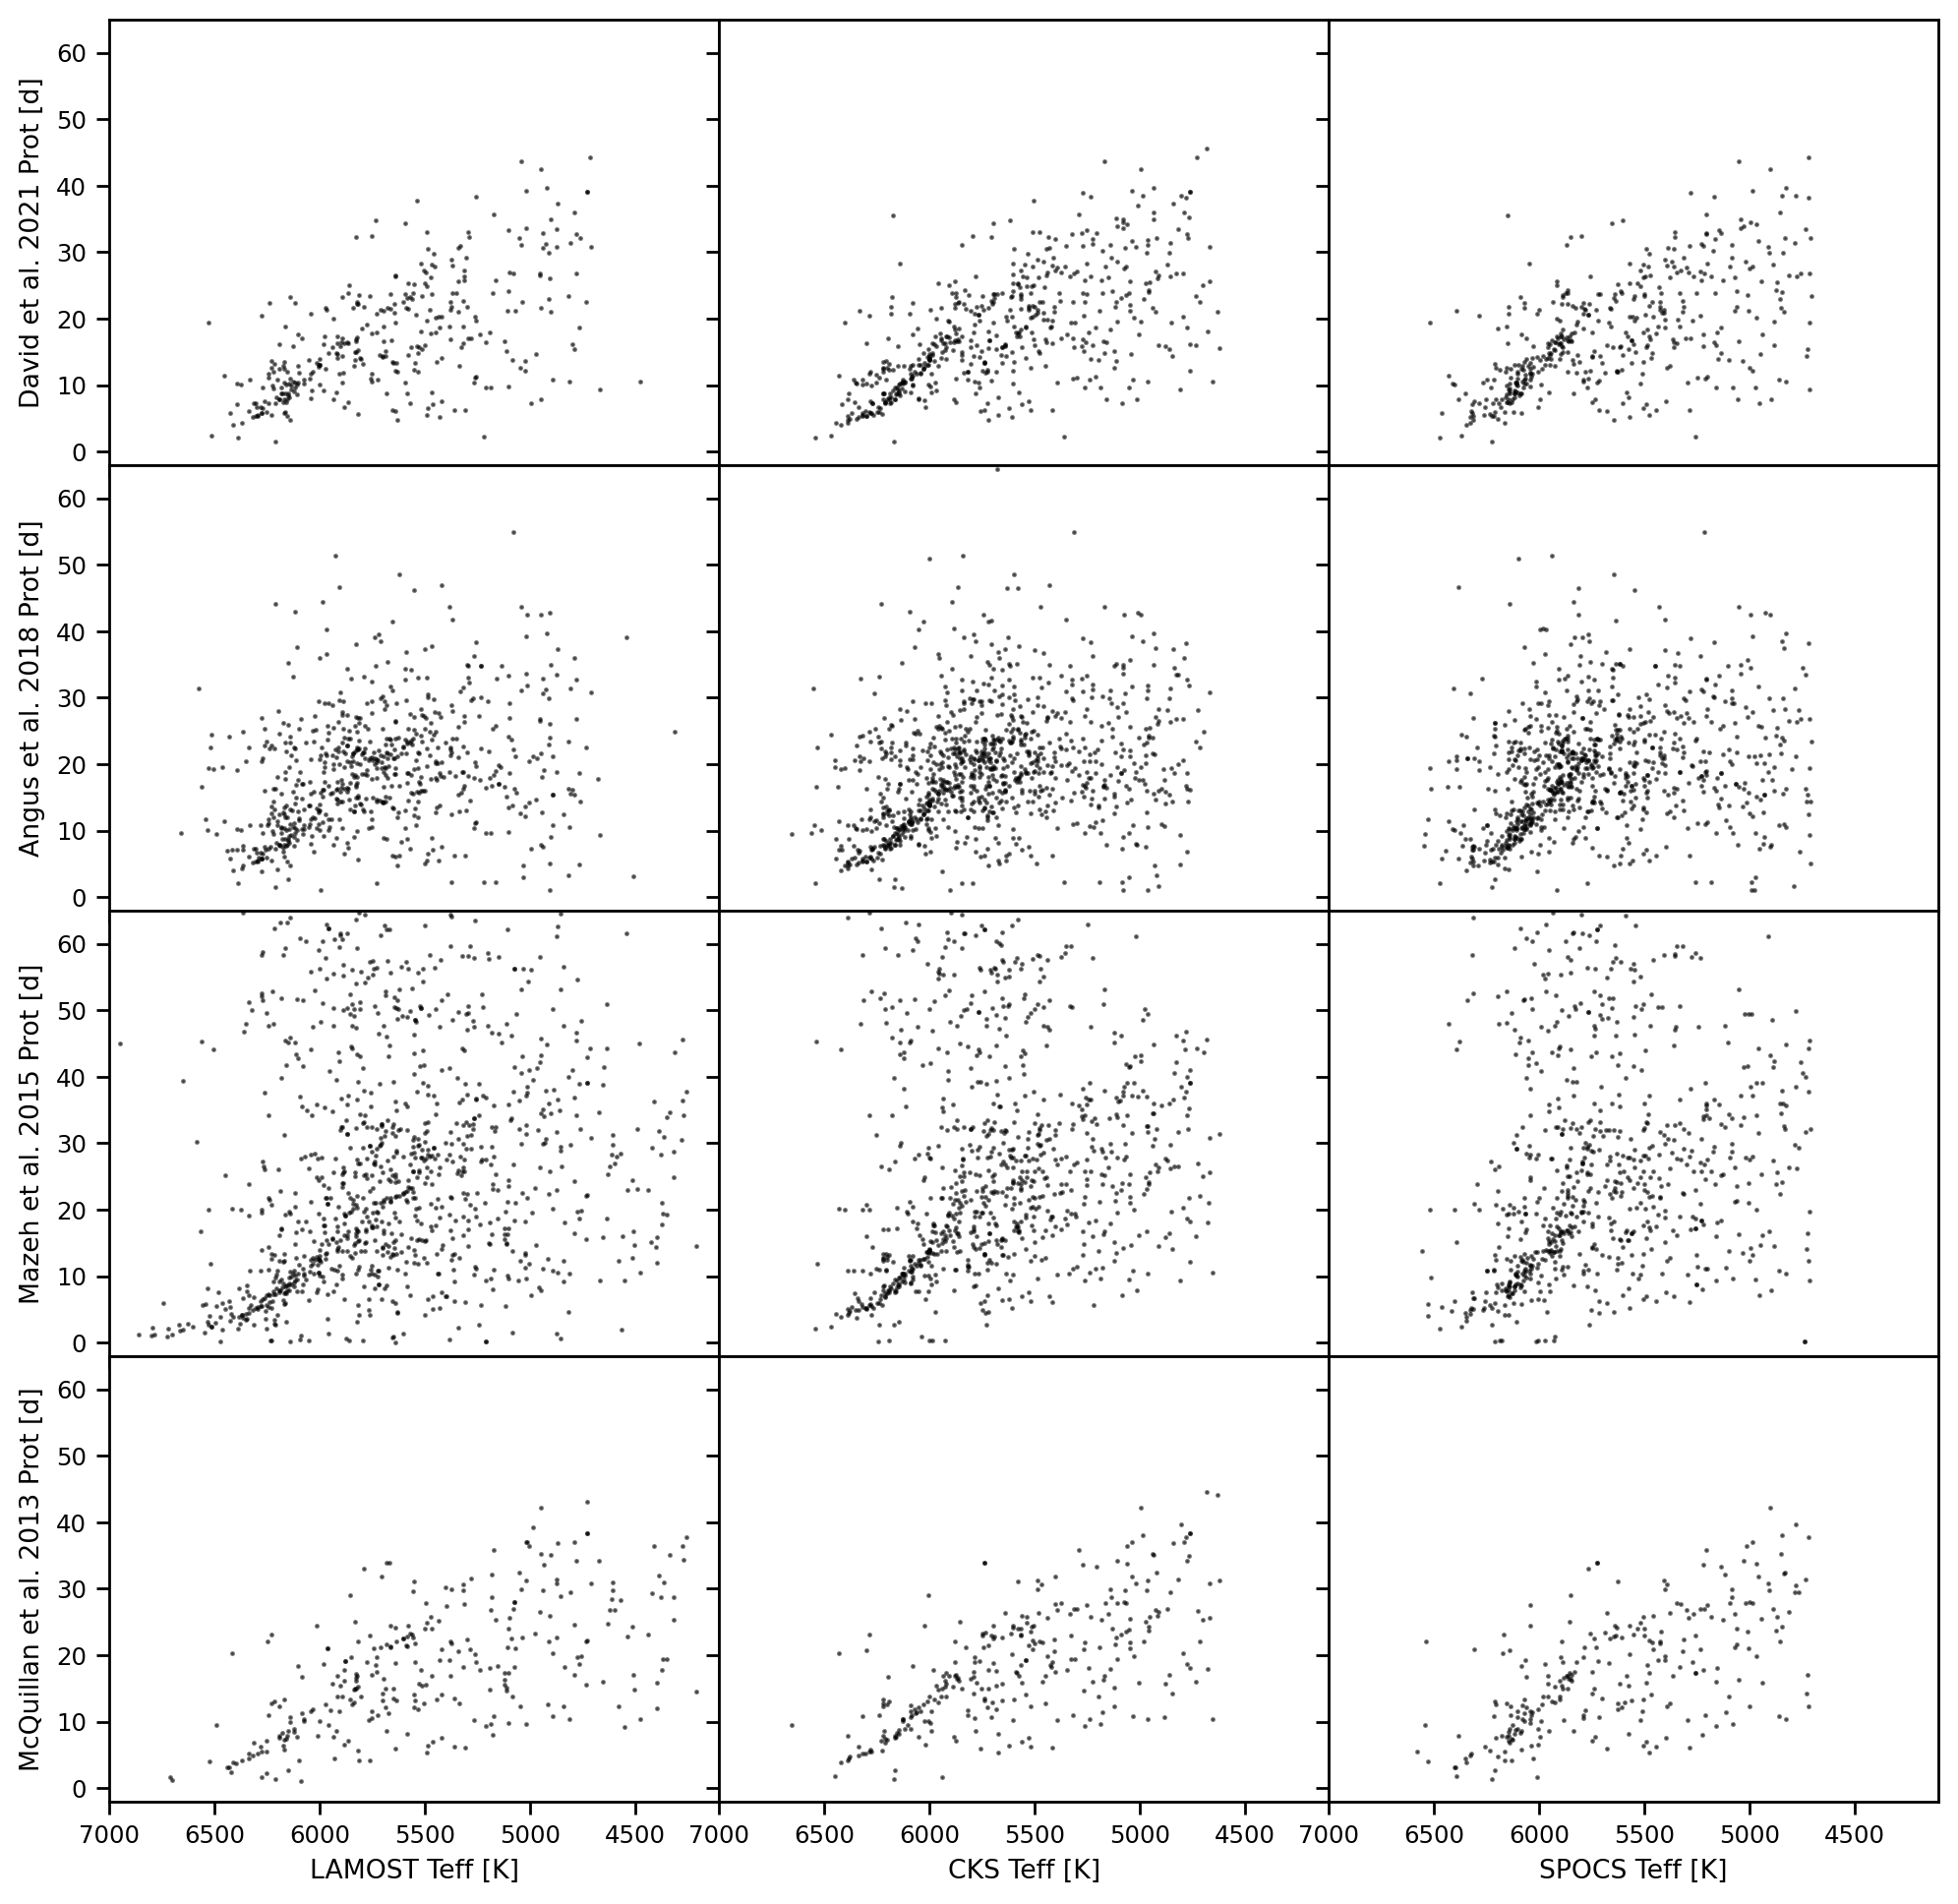

In [222]:
fig, axes = plt.subplots(nrows=4,
                         ncols=3,
                         figsize=(12,12))

sc_kws = {"s":1, "color":"k", "alpha":0.5, "rasterized":True}

axes[0][0].scatter(table['Teff'], table['d21_prot'], **sc_kws)
axes[1][0].scatter(table['Teff'], table['a18_period'], **sc_kws)
axes[2][0].scatter(table['Teff'], table['m15_Prot'], **sc_kws)
axes[3][0].scatter(table['Teff'], table['m13_Prot'], **sc_kws)


axes[0][1].scatter(table['cks_Teff'], table['d21_prot'], **sc_kws)
axes[1][1].scatter(table['cks_Teff'], table['a18_period'], **sc_kws)
axes[2][1].scatter(table['cks_Teff'], table['m15_Prot'], **sc_kws)
axes[3][1].scatter(table['cks_Teff'], table['m13_Prot'], **sc_kws)


axes[0][2].scatter(table['bf18_Teff'], table['d21_prot'], **sc_kws)
axes[1][2].scatter(table['bf18_Teff'], table['a18_period'], **sc_kws)
axes[2][2].scatter(table['bf18_Teff'], table['m15_Prot'], **sc_kws)
axes[3][2].scatter(table['bf18_Teff'], table['m13_Prot'], **sc_kws)


for i in range(4):
    for j in range(3):
        if i<3:
            axes[i][j].set_xticklabels('')
        if j>0:
            axes[i][j].set_yticklabels('')
            
        axes[i][j].set_xlim(7000,4100)
        axes[i][j].set_ylim(-2,65)

        
axes[3][0].set_xlabel('LAMOST Teff [K]')
axes[3][1].set_xlabel('CKS Teff [K]')
axes[3][2].set_xlabel('SPOCS Teff [K]')

axes[0][0].set_ylabel('David et al. 2021 Prot [d]')
axes[1][0].set_ylabel('Angus et al. 2018 Prot [d]')
axes[2][0].set_ylabel('Mazeh et al. 2015 Prot [d]')
axes[3][0].set_ylabel('McQuillan et al. 2013 Prot [d]')

plt.subplots_adjust(hspace=0,wspace=0)
plt.savefig('/Users/tdavid/Downloads/tp-comparison.png')

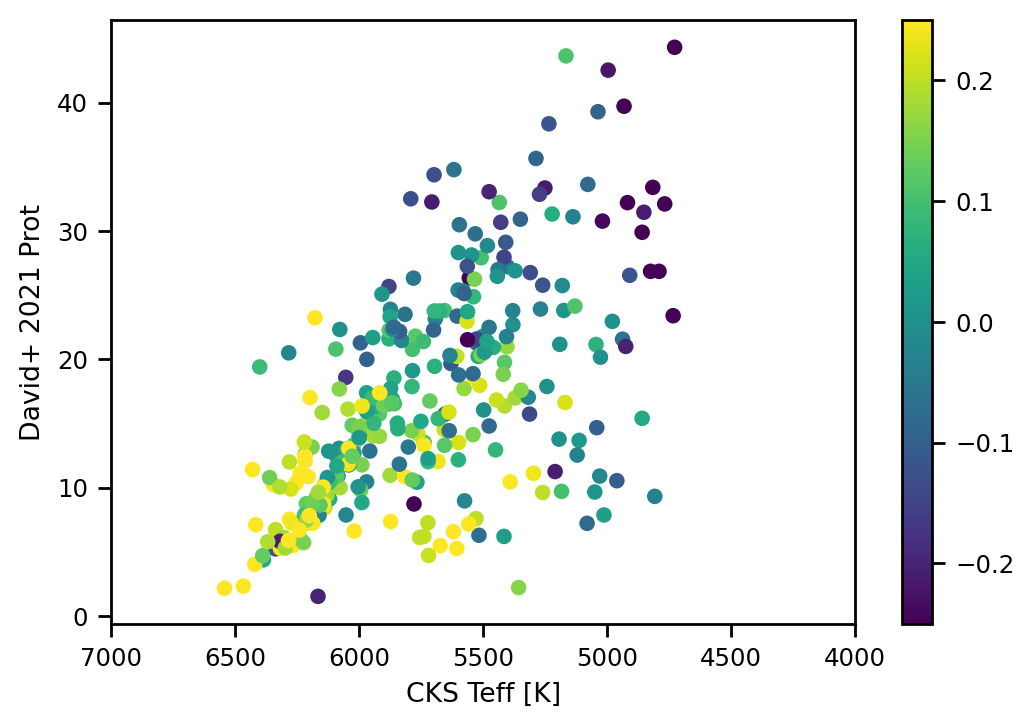

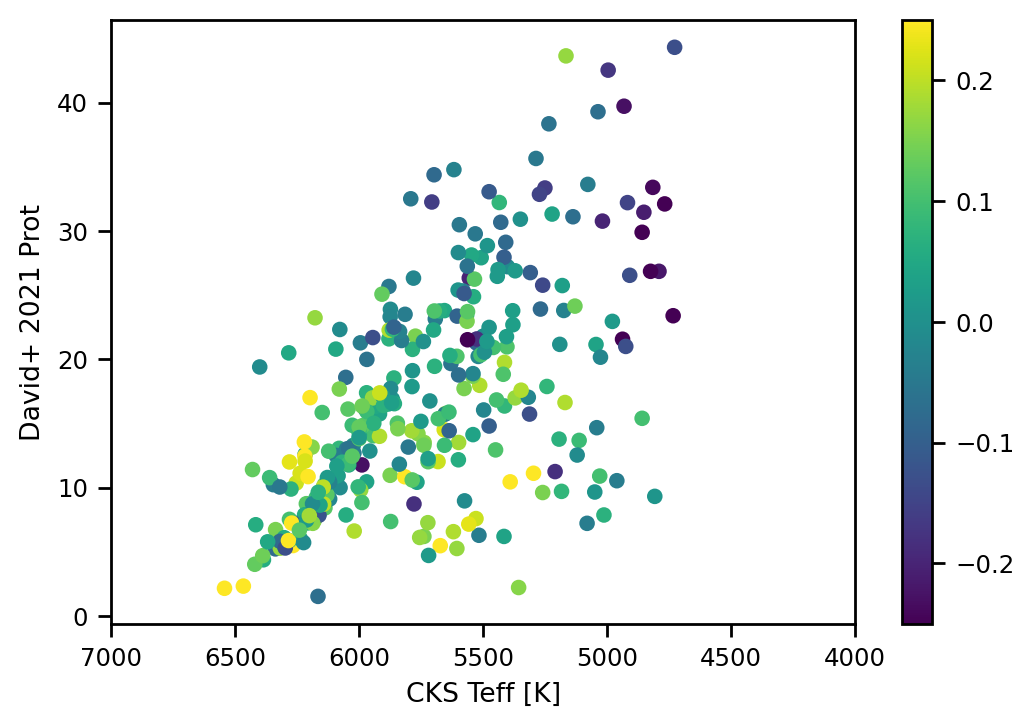

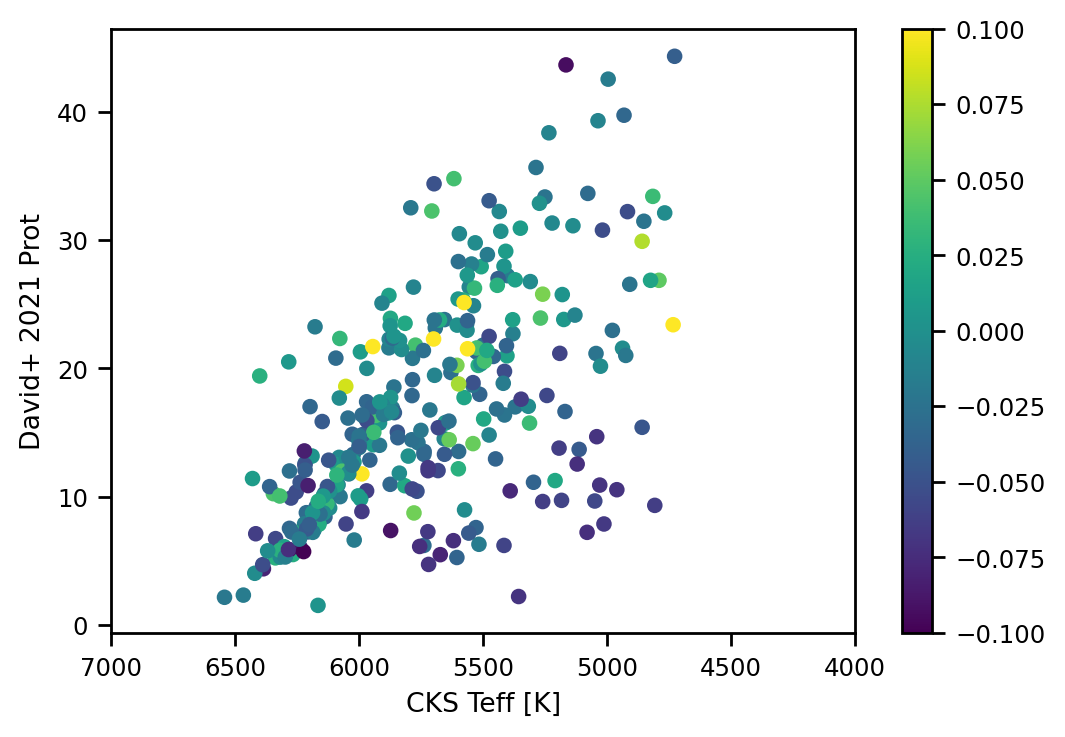

In [151]:
plt.scatter(table['cks_Teff'], table['d21_prot'], c=table['bf18_[Y/Al]'], vmin=-0.25, vmax=0.25)
plt.xlabel('CKS Teff [K]')
plt.ylabel('David+ 2021 Prot')
plt.xlim(7000,4000)
plt.colorbar()
plt.show()


plt.scatter(table['cks_Teff'], table['d21_prot'], c=table['bf18_[Y/Mg]'], vmin=-0.25, vmax=0.25)
plt.xlabel('CKS Teff [K]')
plt.ylabel('David+ 2021 Prot')
plt.xlim(7000,4000)
plt.colorbar()
plt.show()

plt.scatter(table['cks_Teff'], table['d21_prot'], c=table['bf18_[alpha/Fe]'], vmin=-0.1, vmax=0.1)
plt.xlabel('CKS Teff [K]')
plt.ylabel('David+ 2021 Prot')
plt.xlim(7000,4000)
plt.colorbar()
plt.show()

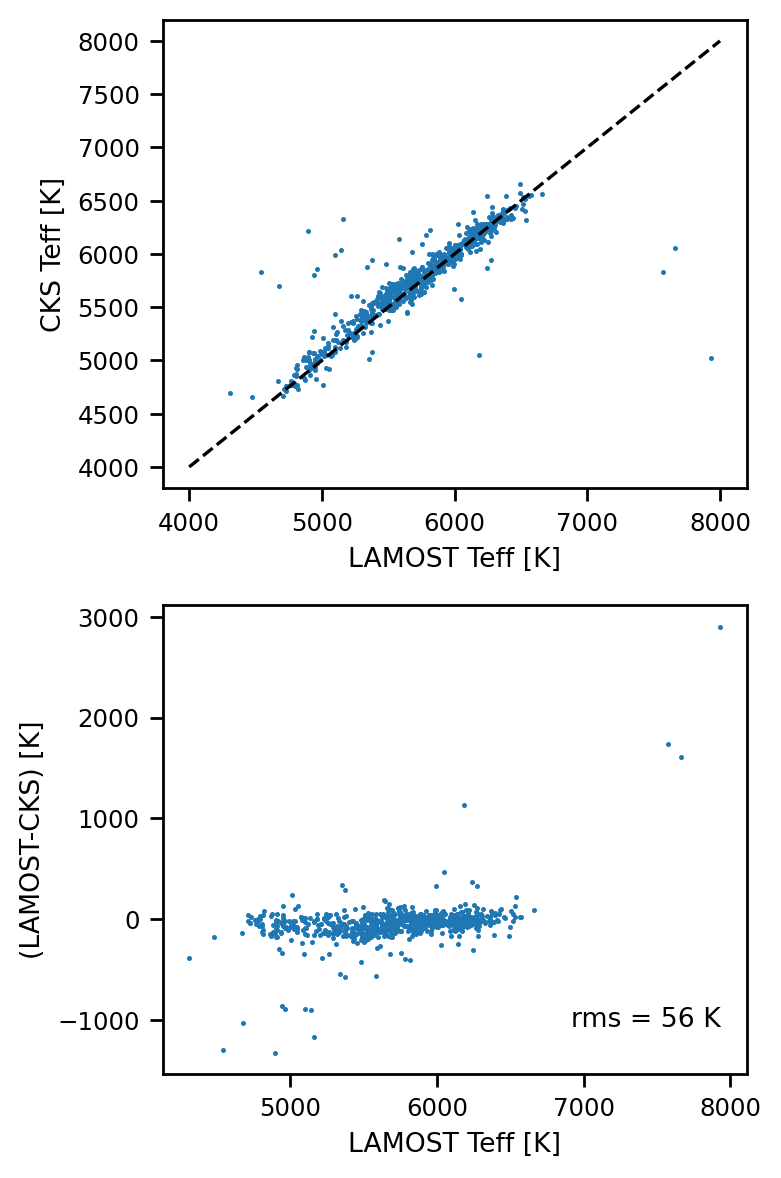

In [170]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,6))
ax[0].scatter(table['Teff'], table['cks_Teff'], s=1)
ax[0].plot([4000,8000], [4000,8000], 'k--')

resid = table['Teff']-table['cks_Teff']
rms = np.sqrt(np.nanmedian(resid ** 2))

ax[1].scatter(table['Teff'], resid, s=1)
ax[1].text(0.7,0.1,'rms = '+str(int(rms))+' K', transform=ax[1].transAxes)

for i in range(2):
    ax[i].set_xlabel('LAMOST Teff [K]')
ax[0].set_ylabel('CKS Teff [K]')
ax[1].set_ylabel('(LAMOST-CKS) [K]')

plt.tight_layout()
plt.show()

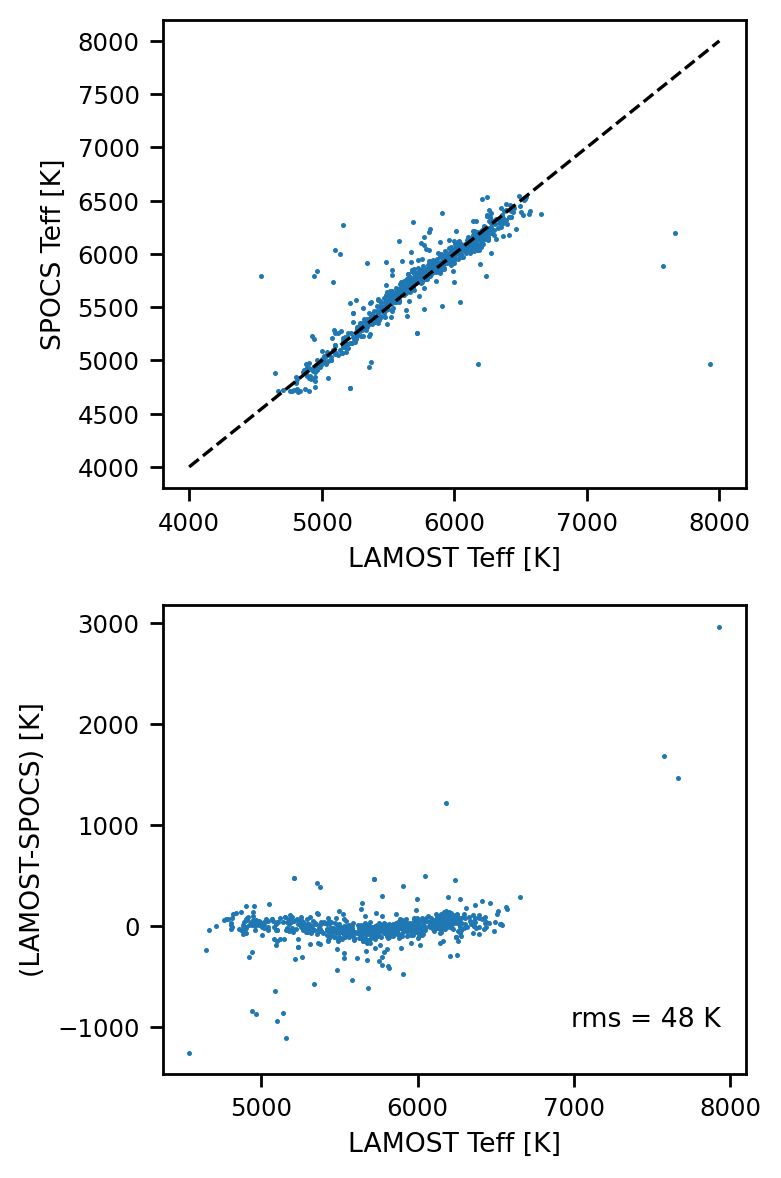

In [171]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,6))
ax[0].scatter(table['Teff'], table['bf18_Teff'], s=1)
ax[0].plot([4000,8000], [4000,8000], 'k--')

resid = table['Teff']-table['bf18_Teff']
rms = np.sqrt(np.nanmedian(resid ** 2))

ax[1].scatter(table['Teff'], resid, s=1)
ax[1].text(0.7,0.1,'rms = '+str(int(rms))+' K', transform=ax[1].transAxes)

for i in range(2):
    ax[i].set_xlabel('LAMOST Teff [K]')
ax[0].set_ylabel('SPOCS Teff [K]')
ax[1].set_ylabel('(LAMOST-SPOCS) [K]')

plt.tight_layout()
plt.show()

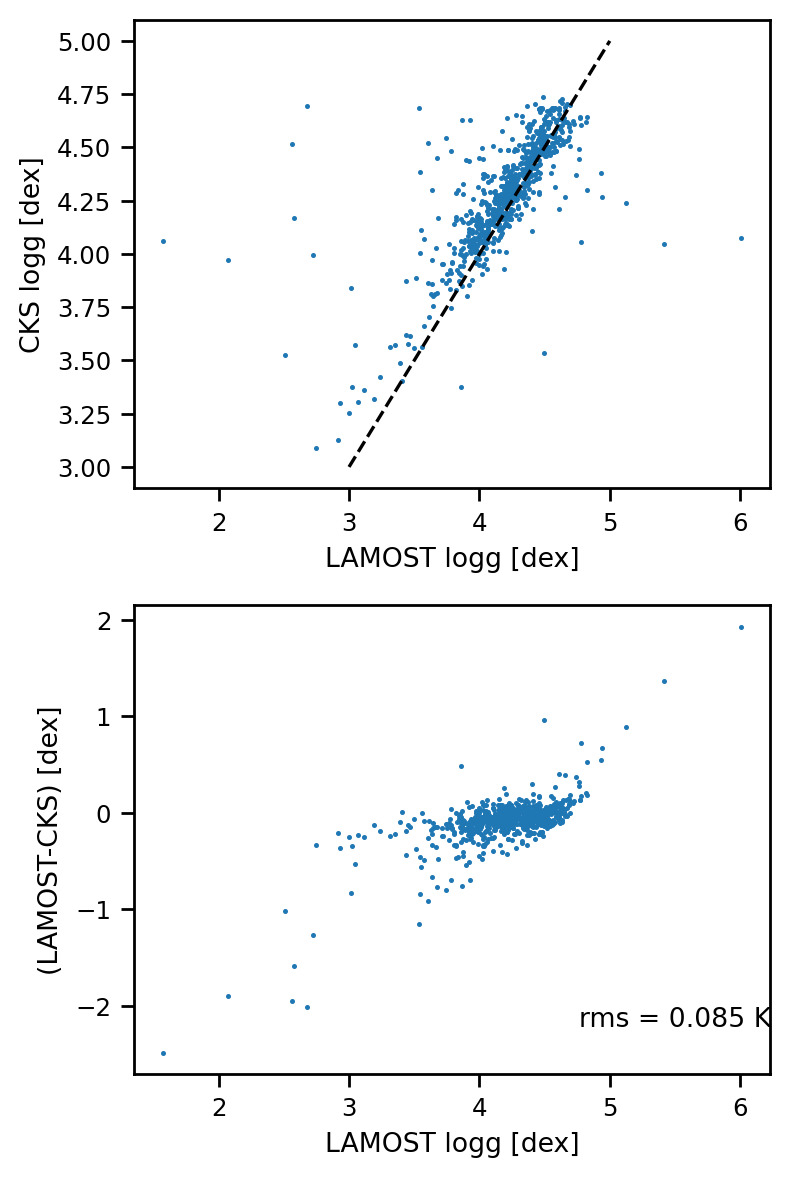

In [176]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,6))
ax[0].scatter(table['logg'], table['p20_cks_slogg'], s=1)
ax[0].plot([3,5], [3,5], 'k--')

resid = table['logg']-table['p20_cks_slogg']
rms = np.sqrt(np.nanmedian(resid ** 2))

ax[1].scatter(table['logg'], resid, s=1)
ax[1].text(0.7,0.1,'rms = '+str(np.round(rms,3))+' K', transform=ax[1].transAxes)

for i in range(2):
    ax[i].set_xlabel('LAMOST logg [dex]')
ax[0].set_ylabel('CKS logg [dex]')
ax[1].set_ylabel('(LAMOST-CKS) [dex]')

plt.tight_layout()
plt.show()

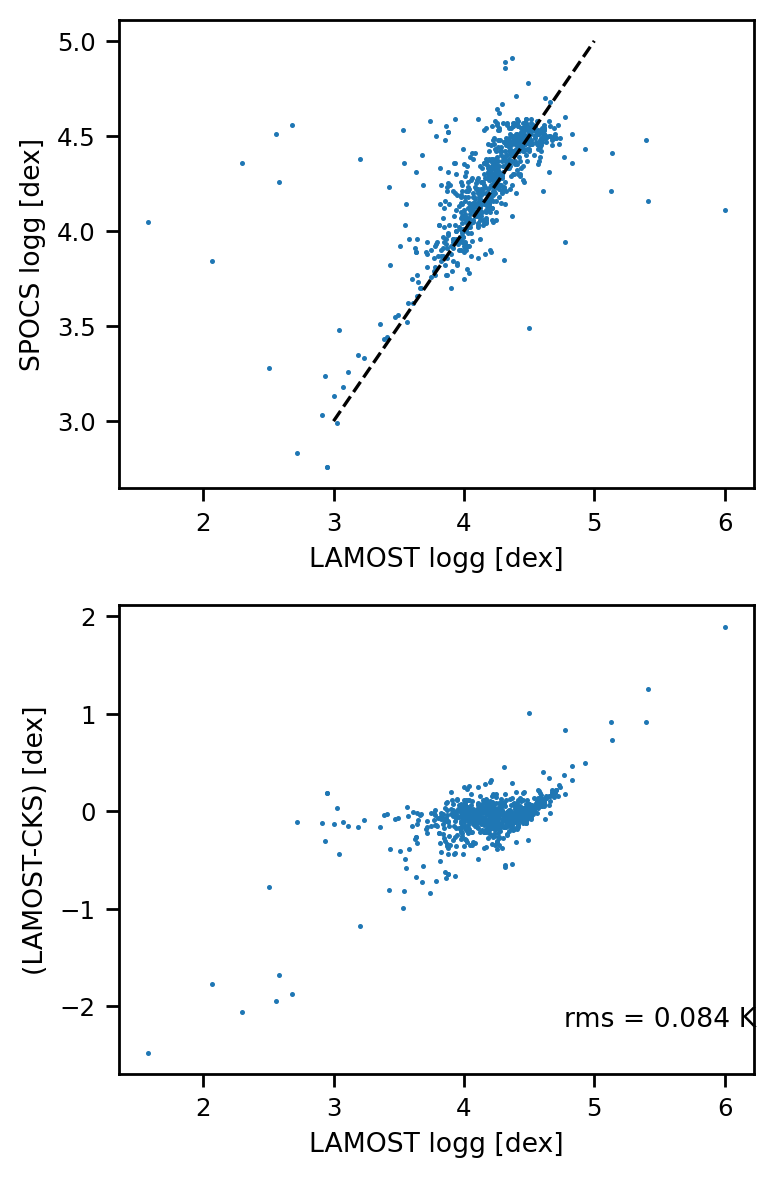

In [177]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,6))
ax[0].scatter(table['logg'], table['bf18_log(g)'], s=1)
ax[0].plot([3,5], [3,5], 'k--')

resid = table['logg']-table['bf18_log(g)']
rms = np.sqrt(np.nanmedian(resid ** 2))

ax[1].scatter(table['logg'], resid, s=1)
ax[1].text(0.7,0.1,'rms = '+str(np.round(rms,3))+' K', transform=ax[1].transAxes)

for i in range(2):
    ax[i].set_xlabel('LAMOST logg [dex]')
ax[0].set_ylabel('SPOCS logg [dex]')
ax[1].set_ylabel('(LAMOST-CKS) [dex]')

plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(4,6))
ax[0].scatter(table['logg'], table['p20_cks_slogg'], s=1)
ax[0].plot([3,5], [3,5], 'k--')

resid = table['logg']-table['p20_cks_slogg']
rms = np.sqrt(np.nanmedian(resid ** 2))

ax[1].scatter(table['logg'], resid, s=1)
ax[1].text(0.7,0.1,'rms = '+str(np.round(rms,3))+' K', transform=ax[1].transAxes)

for i in range(2):
    ax[i].set_xlabel('LAMOST logg [dex]')
ax[0].set_ylabel('CKS logg [dex]')
ax[1].set_ylabel('(LAMOST-CKS) [dex]')

plt.tight_layout()
plt.show()